In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Load the dataset
file_path = 'Country-data.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# Skewness
data.skew(numeric_only=True)

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

In [9]:
# Kurtosis
data.kurtosis(numeric_only=True)

child_mort     1.766882
exports       10.138666
health         0.694196
imports        6.755854
income         7.028657
inflation     41.742502
life_expec     1.151591
total_fer     -0.186779
gdpp           5.527891
dtype: float64

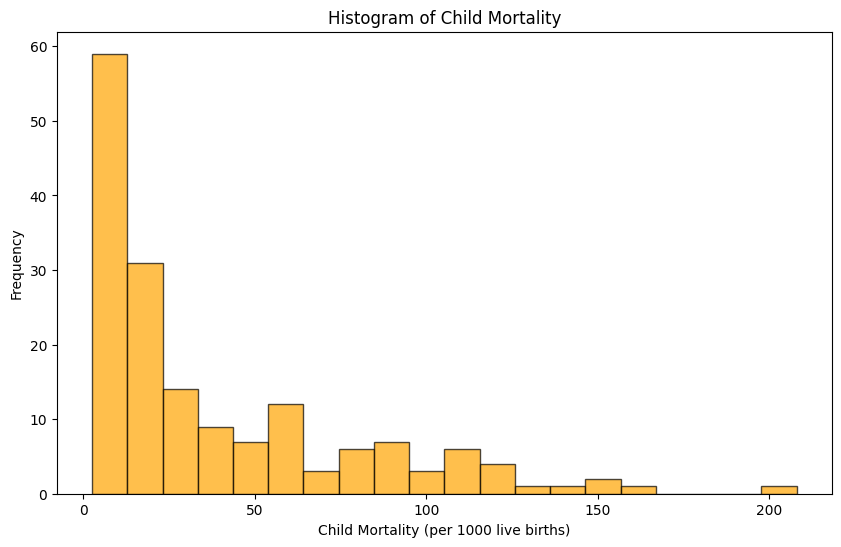

In [7]:
def plot_hist():
    plt.figure(figsize=(10, 6))
    plt.hist(data['child_mort'], bins=20, color='orange', alpha=0.7, edgecolor='black')
    plt.title("Histogram of Child Mortality")
    plt.xlabel("Child Mortality (per 1000 live births)")
    plt.ylabel("Frequency")
    plt.show()

plot_hist()

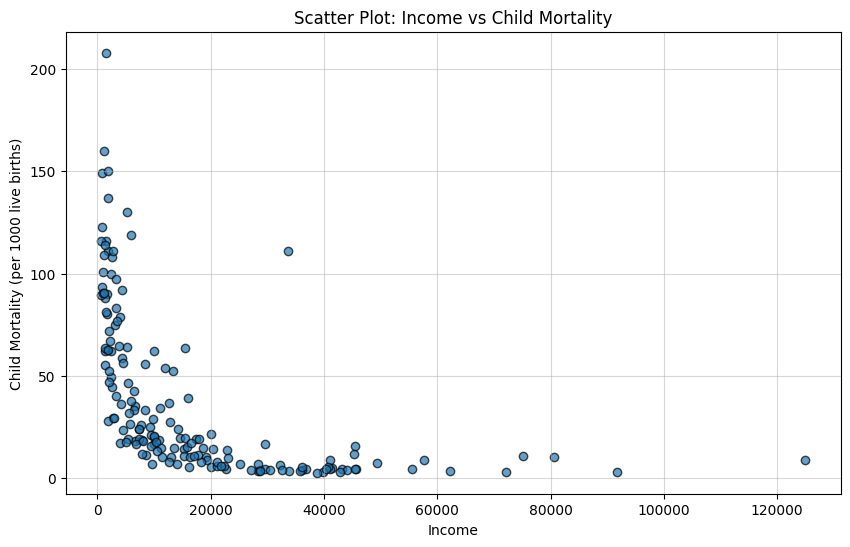

In [6]:
# Scatter Plot: Income vs Child Mortality (Meaningful Interpretation)
plt.figure(figsize=(10, 6))
plt.scatter(data['income'], data['child_mort'], alpha=0.7, edgecolor='black')
plt.title("Scatter Plot: Income vs Child Mortality")
plt.xlabel("Income")
plt.ylabel("Child Mortality (per 1000 live births)")
plt.grid(alpha=0.5)
plt.show()

This plot demonstrates the negative correlation between a country's income and child mortality rate. As income increases, child mortality tends to decrease, reflecting how economic prosperity enables better healthcare, nutrition, and living standards.

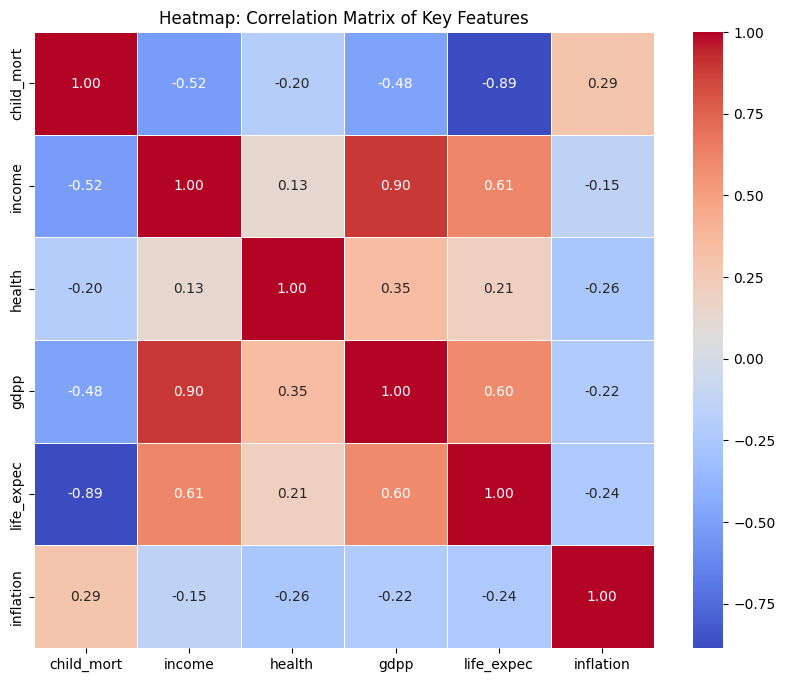

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['child_mort', 'income', 'health', 'gdpp', 'life_expec', 'inflation']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Correlation Matrix of Key Features")
plt.show()

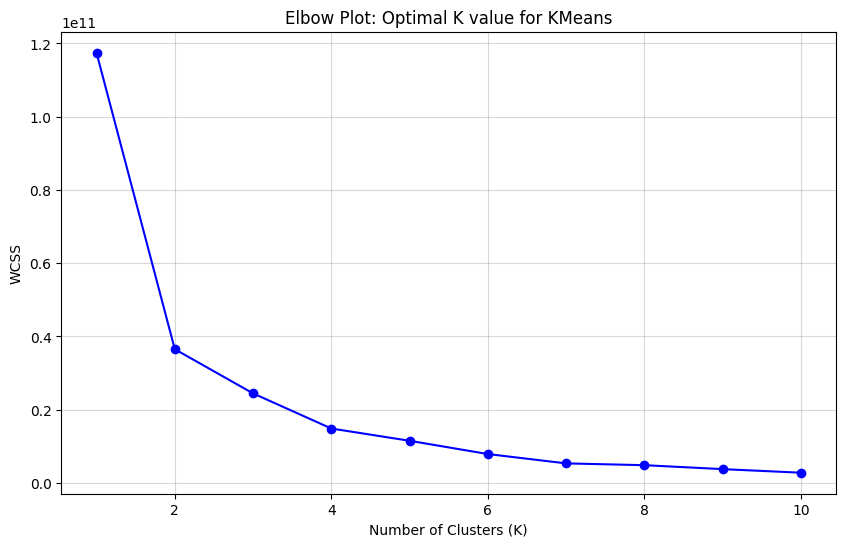

In [10]:
def elbow_curve(data, features):
    feature_data = data[features]
    K_range = range(1, 11)
    wcss = []

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(feature_data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K_range, wcss, marker='o', color='blue')
    plt.title("Elbow Plot: Optimal K value for KMeans")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("WCSS")
    plt.grid(alpha=0.5)
    plt.show()

elbow_curve(data, ['income', 'gdpp'])

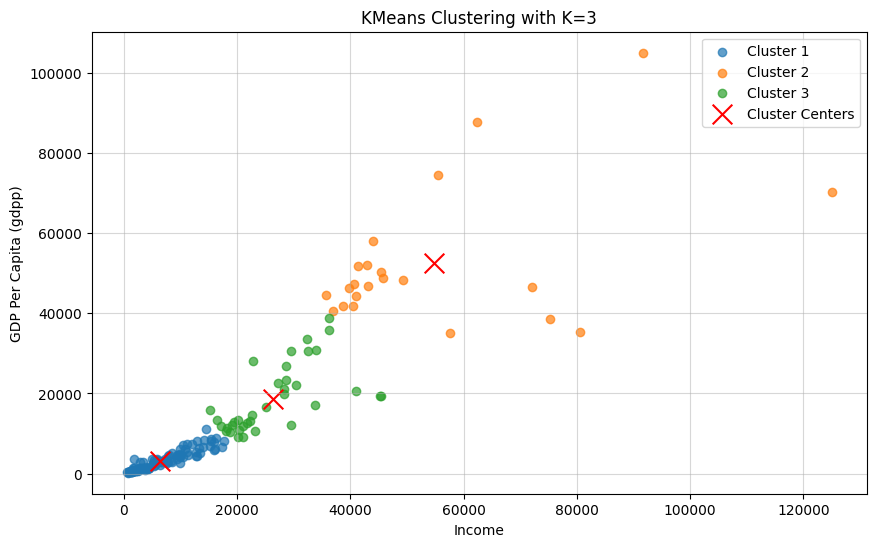

In [11]:
def kmeans_clustering(data, features):
    feature_data = data[features]
    optimal_k = 3 

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(feature_data)

    features_clustered = feature_data.copy()
    features_clustered['Cluster'] = cluster_labels

    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Plot the clustered data with cluster centers
    plt.figure(figsize=(10, 6))
    for cluster in range(optimal_k):
        cluster_data = features_clustered[features_clustered['Cluster'] == cluster]
        plt.scatter(cluster_data['income'], cluster_data['gdpp'], label=f"Cluster {cluster + 1}", alpha=0.7)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='x', s=200, label="Cluster Centers")
    plt.title(f"KMeans Clustering with K={optimal_k}")
    plt.xlabel("Income")
    plt.ylabel("GDP Per Capita (gdpp)")
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

kmeans_clustering(data, ['income', 'gdpp'])

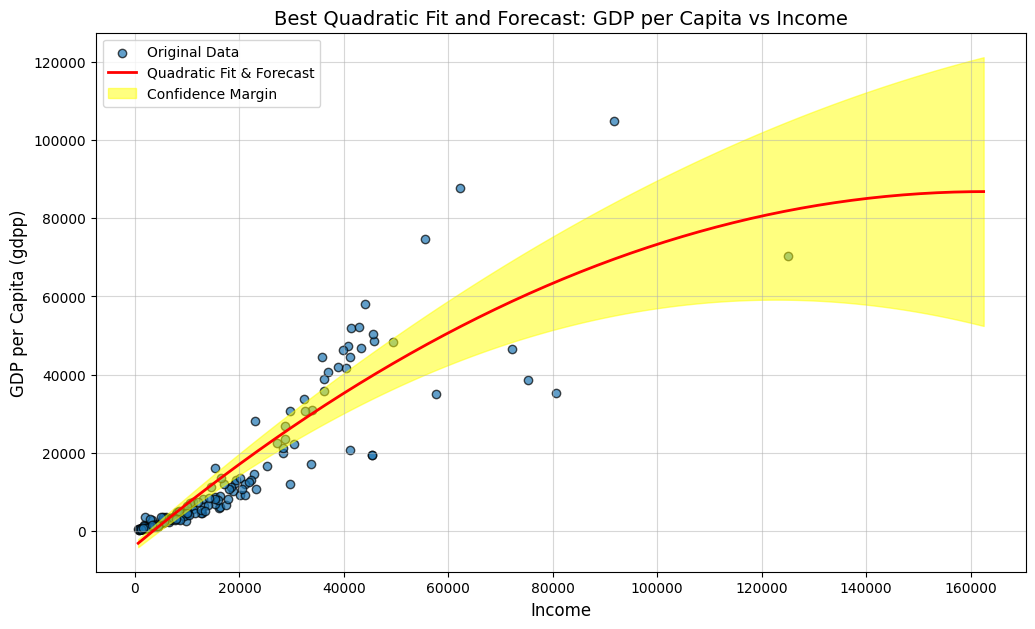

[-3.42198023e-06  1.11425179e+00 -3.86934341e+03]


In [12]:
def curve_fitting(data, features):

    income = data[features[0]]
    gdpp = data[features[1]]

    # Fit a quadratic function to the data
    def quadratic(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the quadratic model
    params, covariance = curve_fit(quadratic, income, gdpp, maxfev=10000)

    # Forecast future values based on the fitted model
    future_income = np.linspace(min(income), max(income) * 1.3, 200)
    future_gdpp_quad = quadratic(future_income, *params)
    
    # Calculate confidence intervals
    perr = np.sqrt(np.diag(covariance))
    upper_confidence = quadratic(future_income, *(params + perr))
    lower_confidence = quadratic(future_income, *(params - perr))

    # Plot the quadratic fit and forecast
    plt.figure(figsize=(12, 7))
    plt.scatter(income, gdpp, alpha=0.7, label='Original Data', edgecolors='k')
    plt.plot(future_income, future_gdpp_quad, 'r-', label='Quadratic Fit & Forecast', linewidth=2)
    plt.fill_between(future_income, lower_confidence, upper_confidence, color='yellow', alpha=0.5, label='Confidence Margin')
    plt.title('Best Quadratic Fit and Forecast: GDP per Capita vs Income', fontsize=14)
    plt.xlabel('Income', fontsize=12)
    plt.ylabel('GDP per Capita (gdpp)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.show()

    # Display the quadratic coefficients
    print(params)


curve_fitting(data, ['income', 'gdpp'])